In [ ]:
# Imported pandaslibrary for datamanipulation and analysis
import pandas as Pndas

# Bringing in the numpy library to handle arrays and do numerical calculations
import numpy as nmpyLib

# Bringing in the matplotlib library to visualise data and plot graphs
import matplotlib.pyplot as plotLIB

# Adding the Seaborn library to improve statistical graphing and data visualisation
import seaborn as sBorn

# Importing LabelEncoder from sklearn to encode categoricalvariables into numericalformat
from sklearn.preprocessing import LabelEncoder

# Importing preprocessing module from sklearn for various preprocessing tasks
from sklearn import preprocessing

# Importing PlotlyExpress for creating interactive visualizations
import plotly.express as POX

# f_classif is imported in order to execute the ANOVAFtest for featureselection.
from sklearn.feature_selection import f_classif

# Importing RandomOverSampler from imbalanced-learn to handle class imbalance via oversampling
from imblearn.over_sampling import RandomOverSampler

# Importing ExtraTreesClassifier from sklearn for feature selection and classification tasks
from sklearn.ensemble import ExtraTreesClassifier

# To show eachclass's precisionscore, recallscore, F1score, and supportscore, import the classificationreport.
from sklearn.metrics import classification_report

# Importing time library for tracking the execution time of code
import time

# Using Plotly's figure_factory import to produce intricate figures and visualisations
import plotly.figure_factory as ff

# Graph_objects are imported from Plotly to create figures and personalise visualisations.
import plotly.graph_objects as go

# ROC curve and AUC score are calculated by importing roc_curve and roc_auc_score.
from sklearn.metrics import roc_curve, roc_auc_score

# Defining and trainingneuralnetworks by importing a sequentialmodel from TensorFlow/Keras
from keras.utils import to_categorical

# Since the time library was already imported, it is being imported once more.
import time

# The TensorFlow/Keras sequential model must be imported in order to define and train neural networks.
from tensorflow.keras.models import Sequential

# Bringing in neuralnetworklayers from Keras, suchas Conv1D, Dense, Flatten, and Dropout
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout

# Importing Keras' Adam optimiser to maximise neuralnetworktraining
from tensorflow.keras.optimizers import Adam

# Bringing in StandardScaler to scale and normalise features to unit variance and zero mean
from sklearn.preprocessing import StandardScaler

# Using synthetic data creation, ADASYN is imported from imbalancedlearn to handle imbalanceddatasets.
from imblearn.over_sampling import ADASYN

# Creating training and test sets from the dataset by importing train_test_split
from sklearn.model_selection import train_test_split

# Importing various metrics like accuracyscore, precisionscore, recallscore, F1score, and ROCAUC score for evaluating classificationperformance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Importing additional metrics like ROCcurve, precisionrecallCurve, and confusionmatrix for evaluatingmodelperformance
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix

import warnings  # Imported warningslibrary to manage warningmessages during codeexecution
warnings.filterwarnings('ignore')  # Suppressing warningmessages to avoidcluttering outputduringruntime

### ***Load Dataset***

In [ ]:
# Load the path of the KC1Dataset
KC1Dataset=Pndas.read_csv('/content/drive/MyDrive/S_N_Project/KC1 - dataset.csv')

### ***Data Preprocessing***

In [ ]:
# Define the columnnames
column_names = [
    'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
    'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
    'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'
]

# Include the KC1Dataset's columnname.
KC1Dataset.columns=column_names

In [ ]:
# use the head function to examine the top 5 rows.
KC1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,83,11,1,11,171,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18,25,107,64,21,True
2,46,8,6,8,141,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16,28,89,52,15,True
3,25,3,1,3,58,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11,10,41,17,5,True
4,43,3,1,3,115,569.73,0.09,11.27,50.53,6423.73,...,35,2,4,0,11,20,74,41,5,True


In [ ]:
# used tail function to check top 5 last rows in our KC1Dataset
KC1Dataset.tail()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
2103,19,2,1,2,40,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10,11,25,15,3,False
2104,23,3,3,3,60,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12,13,39,21,5,False
2105,2,1,1,1,4,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3,1,3,1,1,False
2106,13,1,1,1,17,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6,6,9,8,1,False
2107,11,2,1,2,27,102.80,0.17,6.00,17.13,616.79,...,9,0,0,0,8,6,18,9,3,False


In [ ]:
KC1Dataset.shape

(2108, 22)

In [ ]:
# Get the info. of the datset
KC1Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                2108 non-null   int64  
 1   v(g)               2108 non-null   int64  
 2   ev(g)              2108 non-null   int64  
 3   iv(g)              2108 non-null   int64  
 4   n                  2108 non-null   int64  
 5   v                  2108 non-null   float64
 6   l                  2108 non-null   float64
 7   d                  2108 non-null   float64
 8   i                  2108 non-null   float64
 9   e                  2108 non-null   float64
 10  b                  2108 non-null   float64
 11  t                  2108 non-null   float64
 12  lOCode             2108 non-null   int64  
 13  lOComment          2108 non-null   int64  
 14  lOBlank            2108 non-null   int64  
 15  locCodeAndComment  2108 non-null   int64  
 16  uniq_Op            2108 

In [ ]:
# Check the null values in thwe KC1Dataset
KC1Dataset.isnull().sum()

,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0
i,0
e,0


In [ ]:
# Get the description of the KC1Dataset
KC1Dataset.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,...,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000
mean,20.381404,2.838710,1.674573,2.546964,49.852467,258.818824,0.319118,6.773838,21.249530,5244.872524,...,291.382585,14.531309,0.945446,1.759488,0.131879,7.634725,9.541271,31.057875,18.795066,4.667457
std,29.758539,3.901563,2.201173,3.376568,83.613023,516.409656,0.316384,7.864608,21.501078,17448.746735,...,969.374530,24.192502,3.085918,3.857762,0.703013,5.729992,12.197267,51.784258,32.079720,7.793730
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.670000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.890000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.215000,29.850000,2277.172500,...,126.512500,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.640000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


In [ ]:
fig = POX.scatter(KC1Dataset,
                 x='loc',
                 y='v(g)',
                 color='defects',
                 title='Scatter Plot of loc vs v(g) by Defects')

fig.update_layout(xaxis_title='loc',
                  yaxis_title='v(g)',
                  width=1000,
                  height=600)

fig.show()

In [ ]:
fig = POX.scatter(KC1Dataset,
                 x='ev(g)',
                 y='iv(g)',
                 color='defects',
                 title='Scatter Plot of ev(g) vs iv(g) by Defects')

fig.update_layout(xaxis_title='ev(g)',
                  yaxis_title='iv(g)',
                  width=1000,
                  height=600)

fig.show()

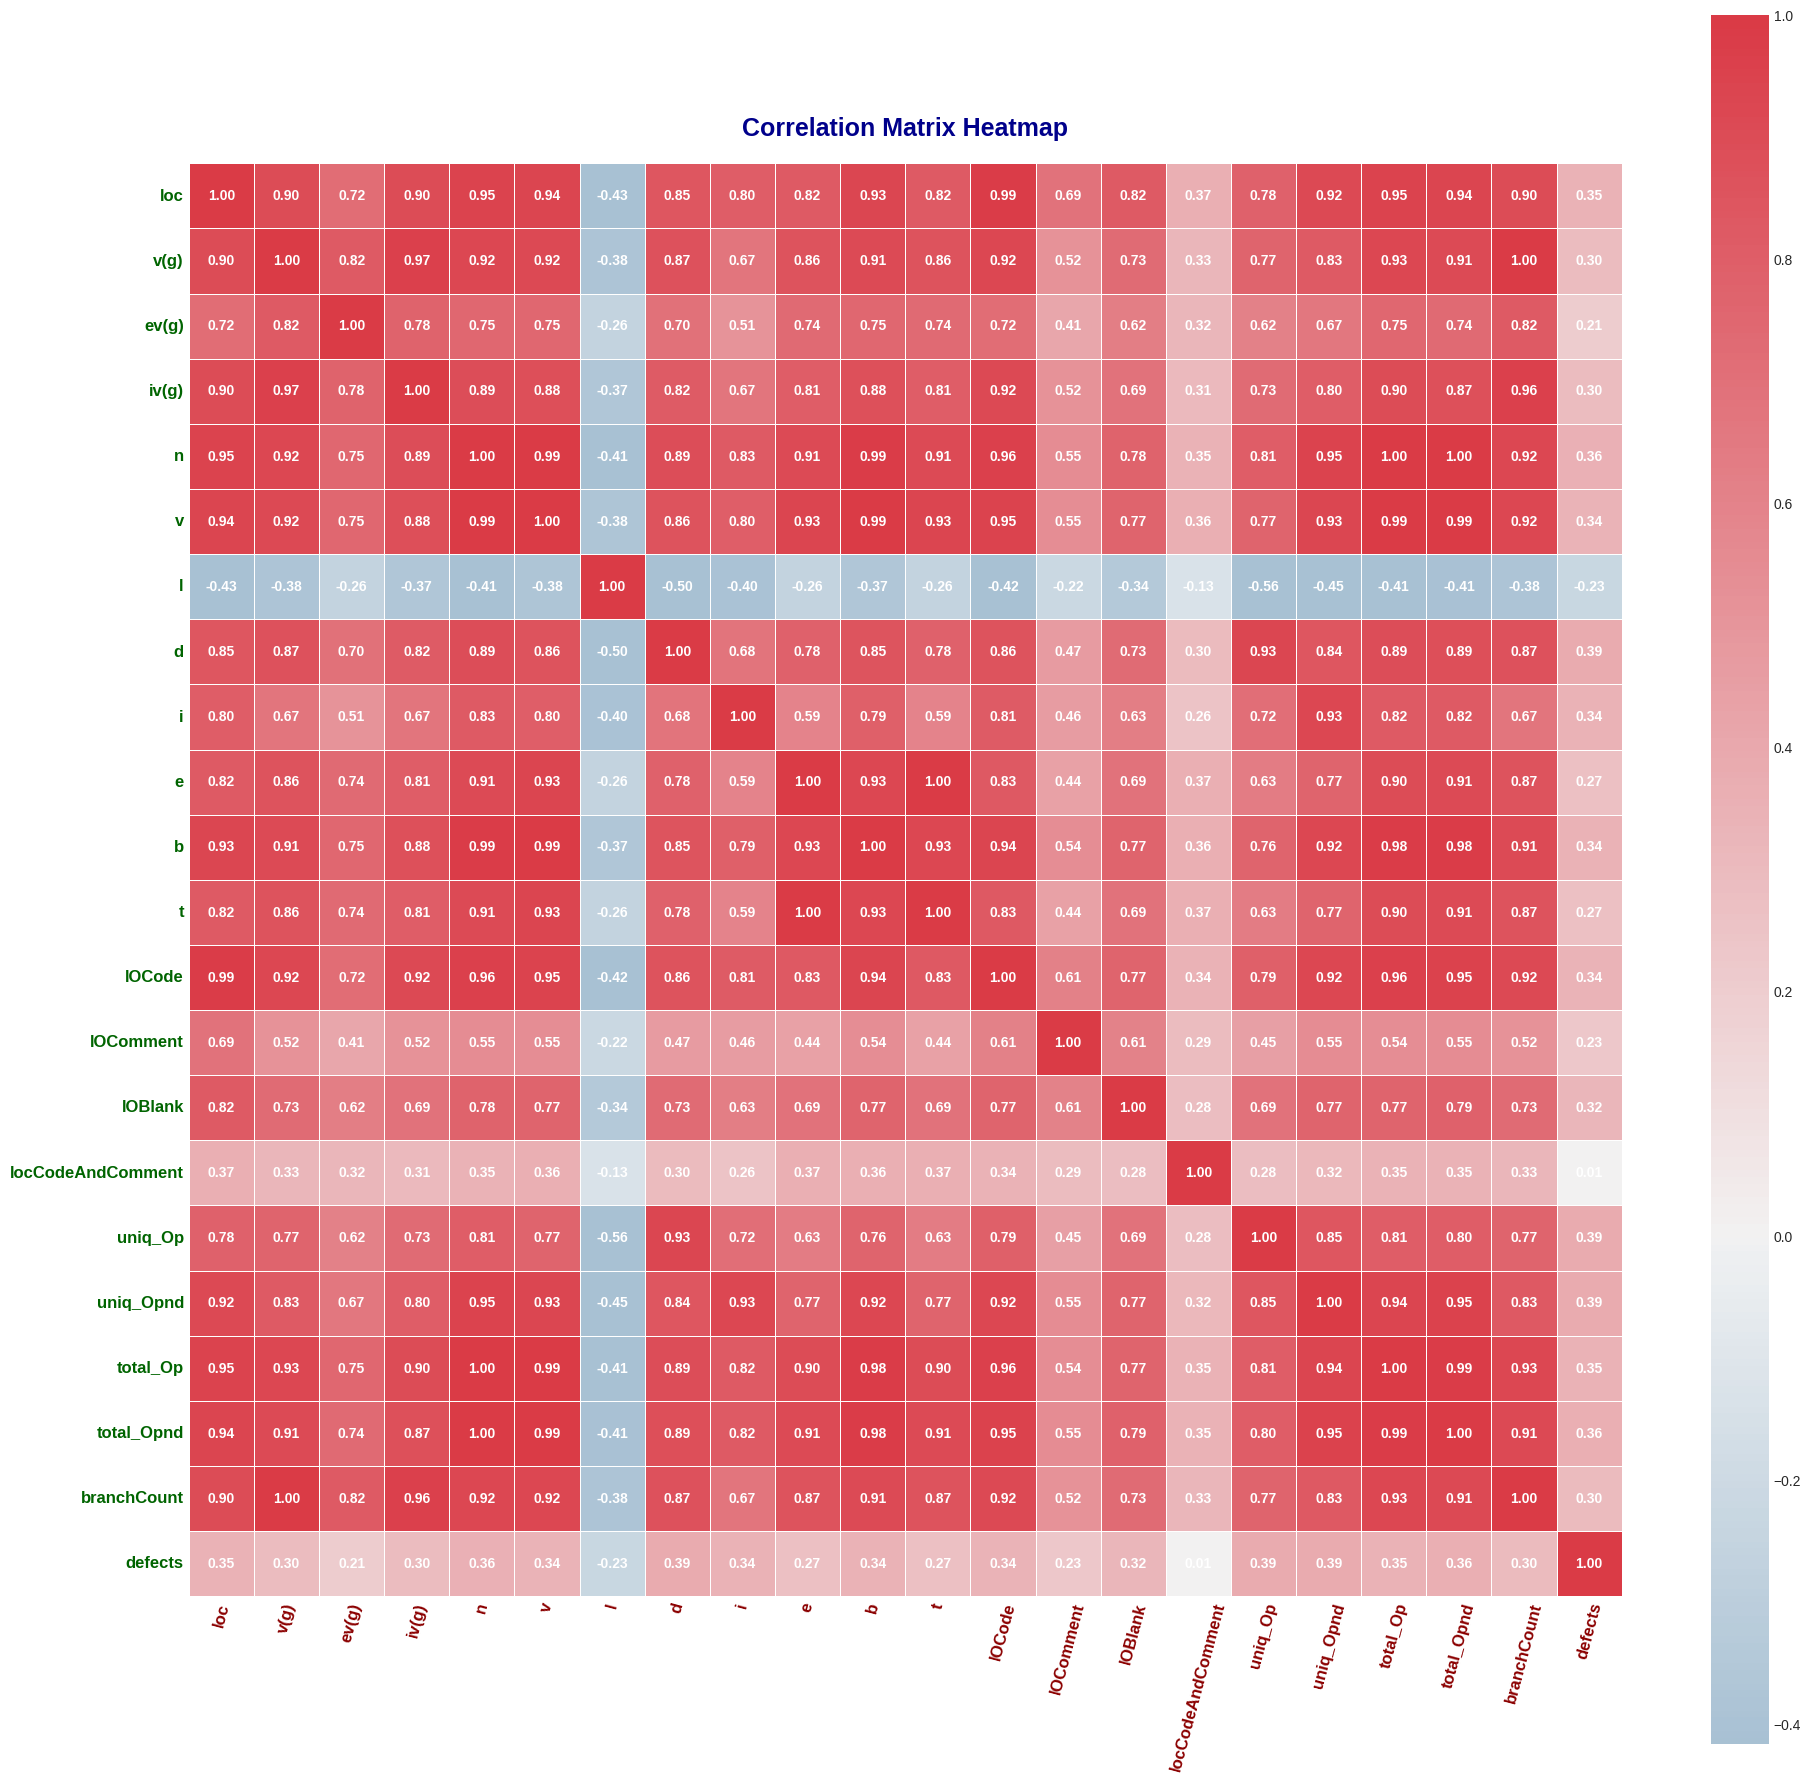

In [ ]:
corr_matrix = KC1Dataset.corr()

plotLIB.style.use('seaborn-darkgrid')

# Define the color palette and update colormap
custom_cmap = sBorn.diverging_palette(240, 10, n=256, as_cmap=True)  # Diverging palette for better balance

# Create a figure with modified dimensions
plotLIB.figure(figsize=(20, 25))

# Plot the heatmap with new color and style options
sBorn.heatmap(corr_matrix,
            annot=True,
            cmap=custom_cmap,  # Use the custom diverging palette
            fmt=".2f",
            annot_kws={"size": 10, "weight": "bold", "color": "white"},  # Customize annotation text
            linewidths=0.6,
            square=True,  # Keep cells square
            cbar_kws={"shrink": 0.7, "aspect": 30},  # Adjust color bar
            center=0,  # Set colormap center
            robust=True)  # Enhance colors for extreme values

# Modify title and axis font properties
plotLIB.title('Correlation Matrix Heatmap', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plotLIB.xticks(fontsize=12, rotation=75, weight='bold', color='darkred')  # Rotate and color x-axis labels
plotLIB.yticks(fontsize=12, weight='bold', color='darkgreen')  # Style y-axis labels

# Ensure the layout is optimized
plotLIB.tight_layout()

# Show the plot
plotLIB.show()

In [ ]:
# Assuming CM1Dataset is your DataFrame and 'defects' is the target column
defects_counts = KC1Dataset['defects'].value_counts()

# Create a pie chart using Plotly
fig = POX.pie(defects_counts,
             values=defects_counts.values,
             names=defects_counts.index,
             title='Distribution of Defects')

# Show the plot
fig.show()

### ***Checking outliers***

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'loc'),
  Text(1, 0, 'v(g)'),
  Text(2, 0, 'ev(g)'),
  Text(3, 0, 'iv(g)'),
  Text(4, 0, 'n'),
  Text(5, 0, 'v'),
  Text(6, 0, 'l'),
  Text(7, 0, 'd'),
  Text(8, 0, 'i'),
  Text(9, 0, 'e'),
  Text(10, 0, 'b'),
  Text(11, 0, 't'),
  Text(12, 0, 'lOCode'),
  Text(13, 0, 'lOComment'),
  Text(14, 0, 'lOBlank'),
  Text(15, 0, 'locCodeAndComment'),
  Text(16, 0, 'uniq_Op'),
  Text(17, 0, 'uniq_Opnd'),
  Text(18, 0, 'total_Op'),
  Text(19, 0, 'total_Opnd'),
  Text(20, 0, 'branchCount'),
  Text(21, 0, 'defects')])

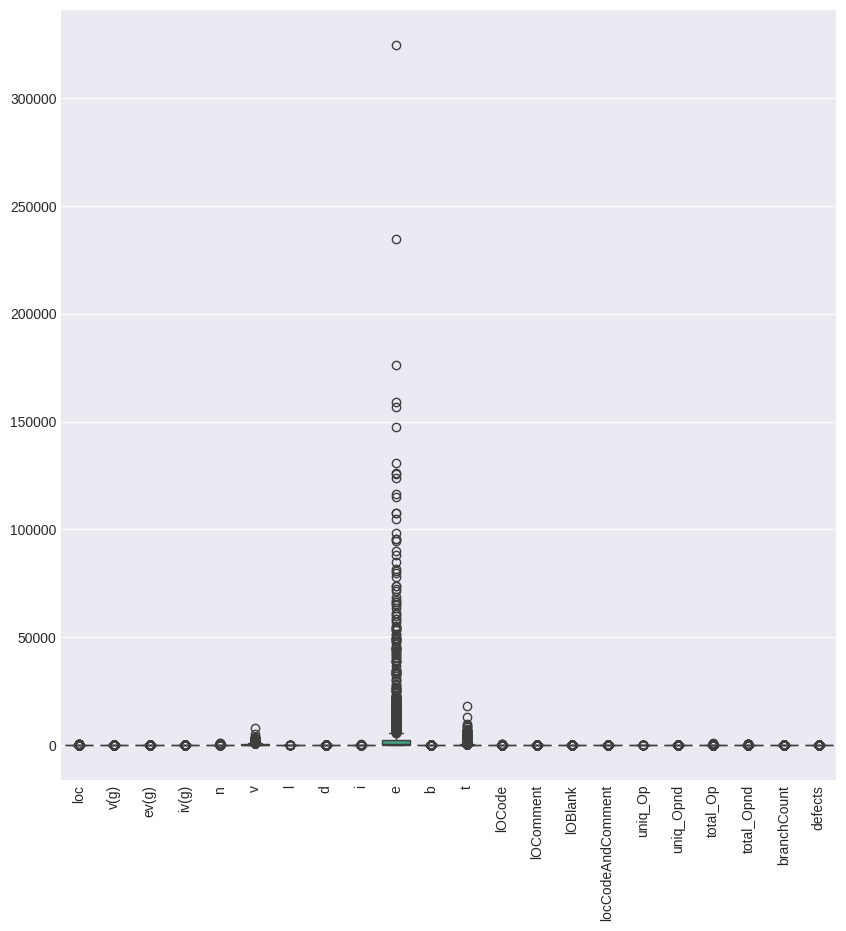

In [ ]:
# To improve visibility, make a figure that is 10 by 10 inches in size.
plotLIB.figure(figsize=(10, 10))

# To see the distribution and outliers in the dataset "KC1Dataset," create a box plot.
sBorn.boxplot(KC1Dataset)

# For easy readability, especially if the x-axis labels are lengthy, rotate them by 90 degrees.
plotLIB.xticks(rotation=90)

### ***Remove outliers***

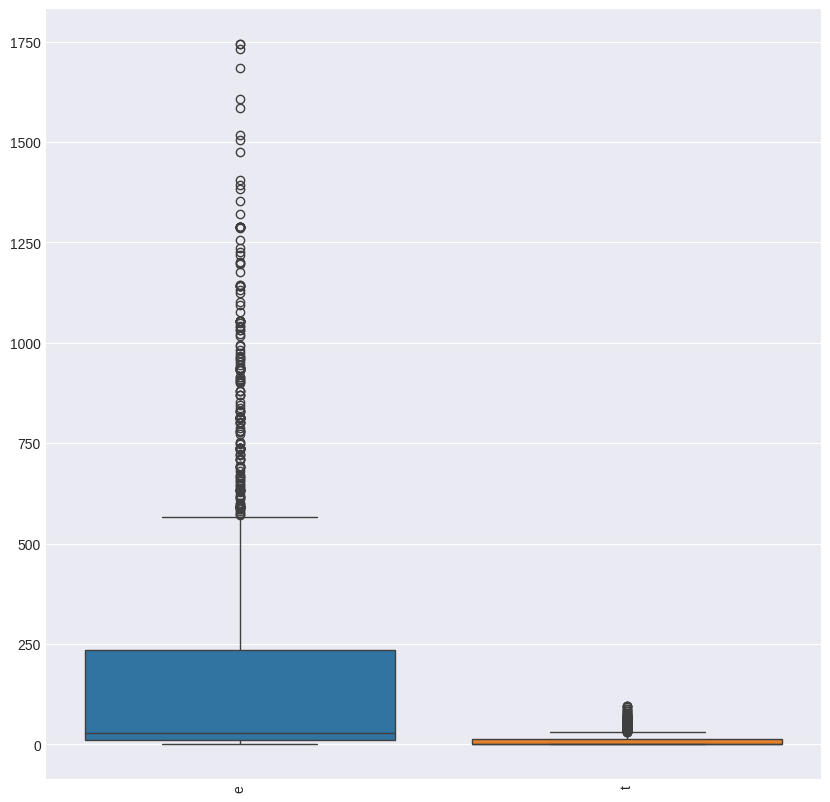

In [ ]:
# To remove outliers, define a function utilising the IQR technique.
def remove_outliers_iqr(KC1Dataset, column):
    Q1 = KC1Dataset[column].quantile(0.25)
    Q3 = KC1Dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    KC1Dataset_filtered = KC1Dataset[(KC1Dataset[column] >= lower_bound) & (KC1Dataset[column] <= upper_bound)]
    return KC1Dataset_filtered

# Use the function to eliminate anomalies from the designated columns.
for column in ['e', 't', 'v']:
    KC1Dataset = remove_outliers_iqr(KC1Dataset, column)

# After removing outliers, plot the boxplot at this point.
plotLIB.figure(figsize=(10, 10))
sBorn.boxplot(data=KC1Dataset[['e', 't']])
plotLIB.xticks(rotation=90)
plotLIB.show()

In [ ]:
# shape of KC1Dataset
KC1Dataset.shape

(1441, 22)

In [ ]:
# giving the  variable name
df_cleaned = KC1Dataset

In [ ]:
# hape of cleaned KC1Dataset
df_cleaned.shape

(1441, 22)

In [ ]:
df_cleaned.dtypes

,0
loc,int64
v(g),int64
ev(g),int64
iv(g),int64
n,int64
v,float64
l,float64
d,float64
i,float64
e,float64


### ***Label Encoder***

In [ ]:
# Word_labels can be understood by the label_encoder object.
label_encoder = preprocessing.LabelEncoder()

# Labels should be encoded in the'species' field.
df_cleaned['defects'] = label_encoder.fit_transform(df_cleaned['defects'])

In [ ]:
df_cleaned.dtypes

,0
loc,int64
v(g),int64
ev(g),int64
iv(g),int64
n,int64
v,float64
l,float64
d,float64
i,float64
e,float64


### ***Split X,y***

In [ ]:
# Variable of interest.
X=df_cleaned.drop('defects',axis=1)
y=df_cleaned['defects']

In [ ]:
X.shape

(1441, 21)

In [ ]:
y.shape

(1441,)

### ***Data Normalization: Standerd Scaler***

In [ ]:
# To normalise the data, initialise the StandardScaler.
scaler = StandardScaler()

# Normalise data by fitting the scaler to features 'X' and transforming them.
X_normalized = scaler.fit_transform(X)

# Use the normaliseddata and the originalcolumn names from 'X' to create a newDataFrame.
X_normalized_df = Pndas.DataFrame(X_normalized, columns=X.columns)

### ***Feature Selection: ANOVA***

In [ ]:
# Apply ANOVA F-value for feature selection
f_statistic, p_values = f_classif(X_normalized_df, y)

Make a DataFrame to hold the outcomes.
feature_scores = Pndas.DataFrame({'Feature': X_normalized_df.columns, 'F-statistic': f_statistic, 'p-value': p_values})

# Sort features in descending order using the F-statistic
feature_scores = feature_scores.sort_values('F-statistic', ascending=False)

# Prior to choosing a feature
fig_before = POX.bar(feature_scores, x='Feature', y='F-statistic', title='Feature Importance Before Selection')
fig_before.show()


# Use the F-statistic to choose the top k features.
k = 10  # Decide how many of the best characteristics to choose.
selected_features = feature_scores['Feature'][:k].tolist()

# Make a fresh DataFrame with just a few chosen features.
X_selected = X_normalized_df[selected_features]

# Use the ANOVA F-value to choose features for the chosen data.
f_statistic_selected, p_values_selected = f_classif(X_selected, y)

# Construct a DataFrame to hold the outcomes for the chosen data.
feature_scores_selected = Pndas.DataFrame({'Feature': X_selected.columns, 'F-statistic': f_statistic_selected, 'p-value': p_values_selected})

# Sort features in decreasing order by F-statistic
feature_scores_selected = feature_scores_selected.sort_values('F-statistic', ascending=False)

# Following the choosing of features
fig_after = POX.bar(feature_scores_selected, x='Feature', y='F-statistic', title='Feature Importance After Selection')
fig_after.show()